In [17]:
# Load Jonah's results

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import scipy.stats

results = np.recfromcsv('blending_dwarf_parameters_new.csv')

In [13]:
results['recovered_absmag_ec1']

array([-10.43150448,  -7.05810439,  -8.27718377,  -4.7868204 ,
        -8.75611462,  -7.71219825,  -9.09332104,  -9.61630059,
        -8.71962518,   0.        ,  -9.3501158 ,  -9.59845777,
       -10.68488448,  -6.84278659,  -4.10901206,  -5.96020243,
        -5.24075936,  -9.608257  ,  -6.62381896,  -9.11554465,
        -8.43138314,  -5.74073921,  -6.11074434,  -5.57837734,
        -6.80871637,  -3.15421419,  -9.18365298,  -6.14174609,
        -6.22776495,  -5.74140248,  -5.69500746, -10.32993956,
        -7.13017231,  -8.93930608,  -6.28859562,  -4.58662241,
        -5.88241681,  -8.47632294,  -5.41054925,  -4.95628834,
         0.        ,  -8.53912657,  -6.25646108,  -5.12154494,
       -11.19488004,  -5.2427759 ,  -6.83995888,  -7.7555775 ,
        -9.67772214,  -5.63315713])

Text(0.5,1,'fit = 0.63*x + 2.55')

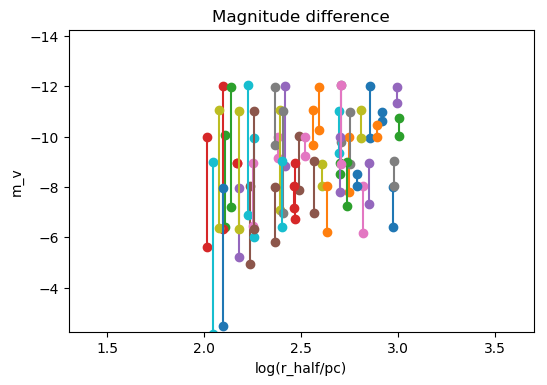

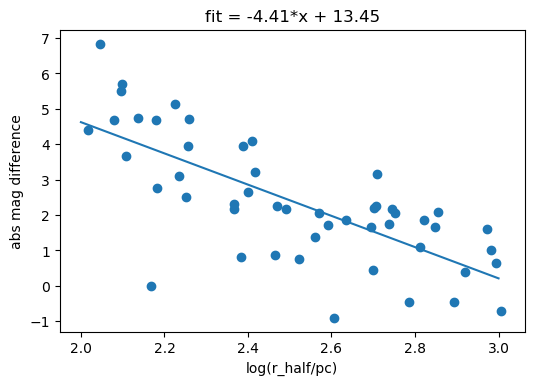

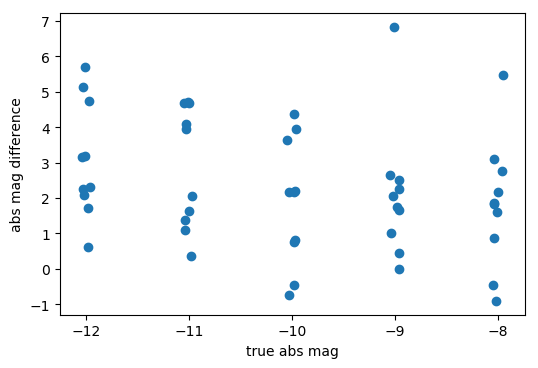

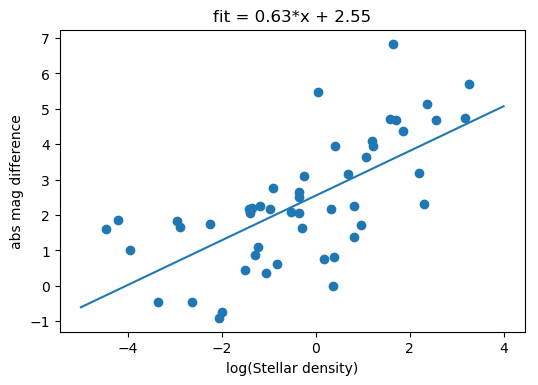

In [25]:
ext = 2

delta = results['recovered_absmag_ec{}'.format(ext)] - results['m_v']

plt.figure()
for dwarf in results:
    x = dwarf['logrhalf_pc']
    true_mag = dwarf['m_v']
    recovered_mag = dwarf['recovered_absmag_ec2']
    plt.plot([x,x], [true_mag, recovered_mag], '-o')
plt.xlim(1.3, 3.7)
plt.ylim(-14.25, -2.25)
plt.gca().invert_yaxis()
plt.ylabel('m_v')
plt.xlabel('log(r_half/pc)')
plt.title('Magnitude difference')

plt.figure()
plt.scatter(results['logrhalf_pc'], delta)
plt.xlabel('log(r_half/pc)')
plt.ylabel('abs mag difference')
fit = np.polyfit(results['logrhalf_pc'], delta, 1)
m,b = fit
fit_func = np.poly1d(fit)
xx = np.arange(2.0, 3.3)
plt.plot(xx, fit_func(xx))
plt.title("fit = {:.2f}*x + {:.2f}".format(m,b))


plt.figure()
plt.scatter(results['m_v'], delta)
plt.xlabel('true abs mag')
plt.ylabel('abs mag difference')

plt.figure()
plt.scatter(np.log(results['density']), delta)
plt.xlabel('log(Stellar density)')
plt.ylabel('abs mag difference')
m, b, r, p, std_err = scipy.stats.linregress(np.log(results['density']), delta)
xx = np.arange(-5, 5)
yy = m*xx + b
plt.plot(xx, yy)
plt.title("fit = {:.2f}*x + {:.2f}".format(m,b))

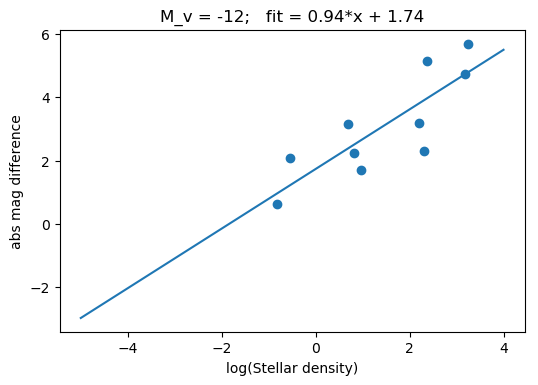

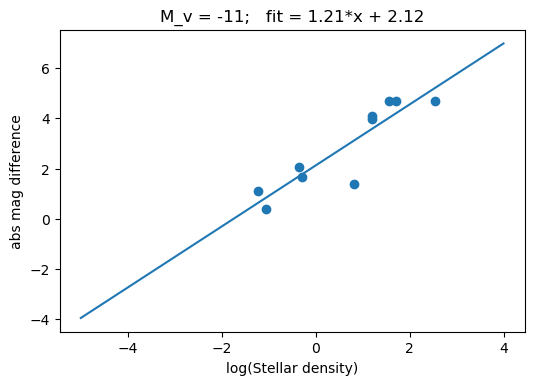

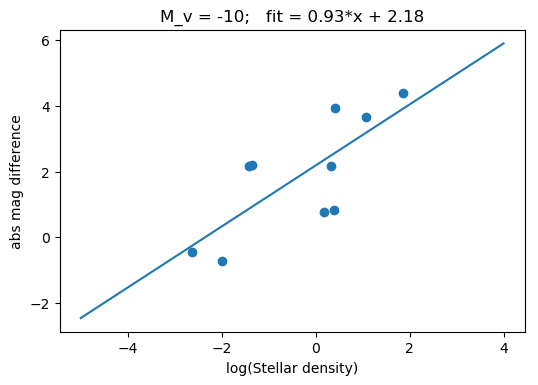

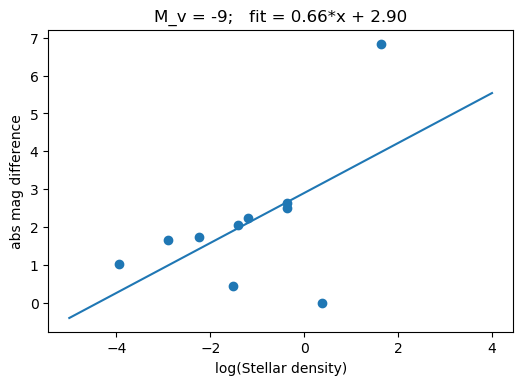

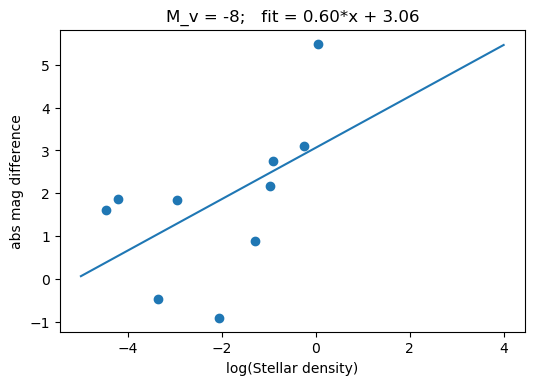

In [11]:
# Stellar density dependence, binned by m_v

for mv in [-12, -11, -10, -9, -8]:
    cut = abs(results['m_v'] - mv) < 0.3
    plt.figure()
    plt.scatter(np.log(results[cut]['density']), delta[cut])
    plt.xlabel('log(Stellar density)')
    plt.ylabel('abs mag difference')
    plt.title('M_v = {}'.format(mv))
    
    fit = np.polyfit(np.log(results[cut]['density']), delta[cut], 1)
    m,b = fit
    fit_func = np.poly1d(fit)
    xx = np.arange(-5, 5)
    plt.plot(xx, fit_func(xx))
    plt.title("M_v = {};   ".format(mv) + "fit = {:.2f}*x + {:.2f}".format(m,b))

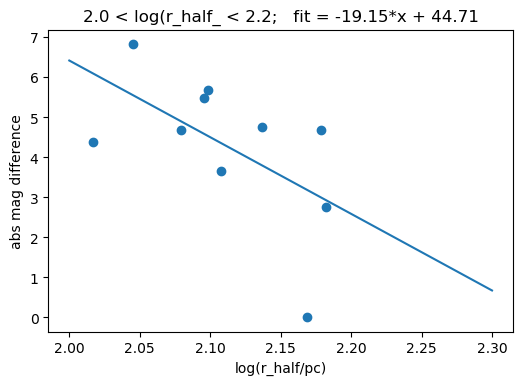

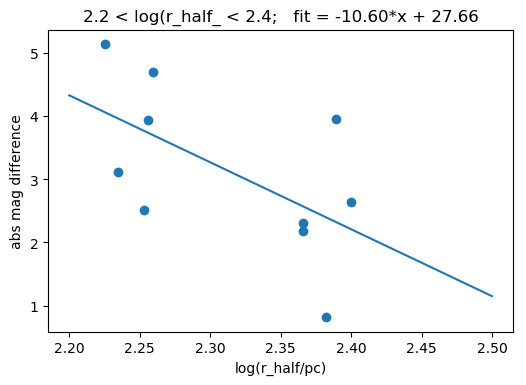

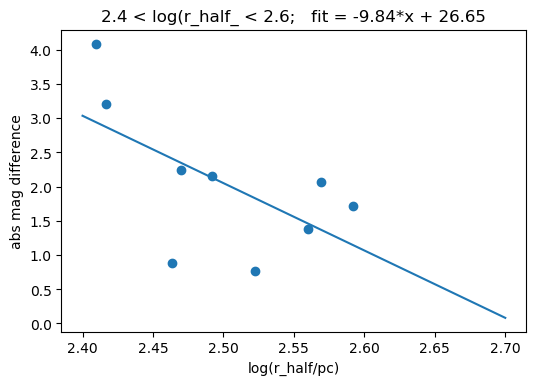

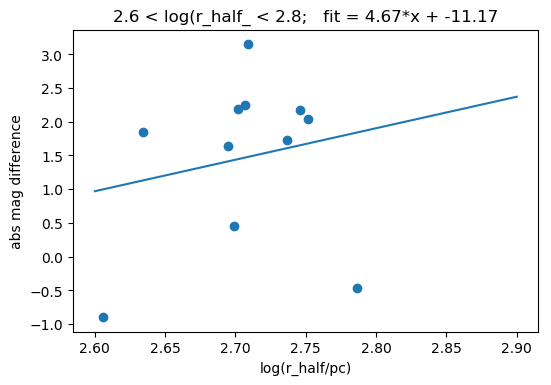

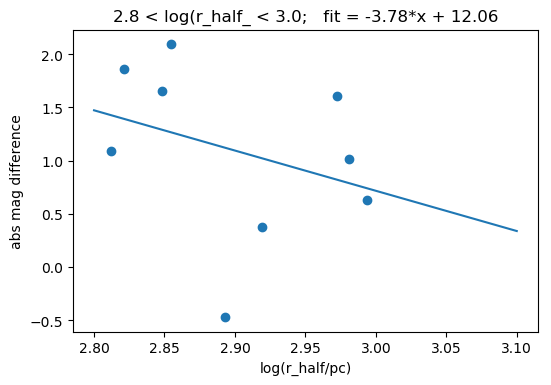

In [12]:
# r_half dependence, binned by r_half

bins = np.arange(2.0, 3.1, 0.2)
for i in range(len(bins)-1):
    cut = (bins[i] < results['logrhalf_pc']) & (results['logrhalf_pc'] < bins[i+1])
    
    plt.figure()
    plt.scatter(results[cut]['logrhalf_pc'], delta[cut])
    plt.xlabel('log(r_half/pc)')
    plt.ylabel('abs mag difference')
    fit = np.polyfit(results['logrhalf_pc'][cut], delta[cut], 1)
    m,b = fit
    fit_func = np.poly1d(fit)
    xx = np.arange(bins[i], bins[i+1]+0.1, 0.05)
    plt.plot(xx, fit_func(xx))
    plt.title("{} < log(r_half_ < {};   fit = {:.2f}*x + {:.2f}".format(bins[i], bins[i+1], m,b))

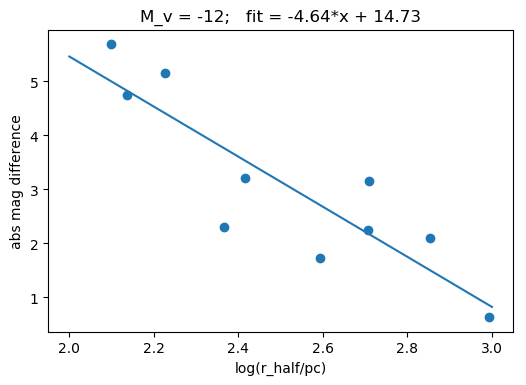

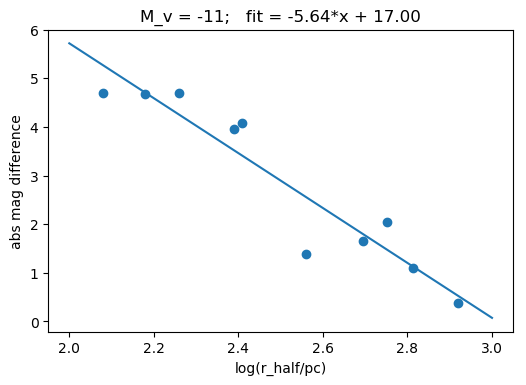

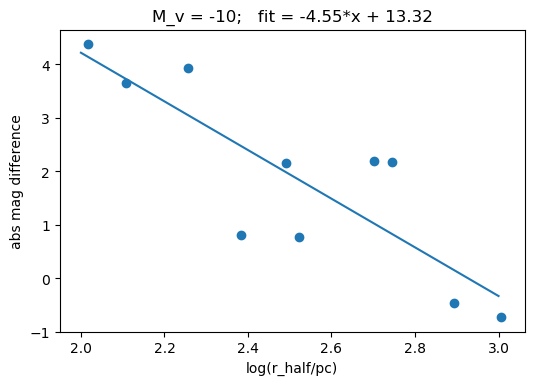

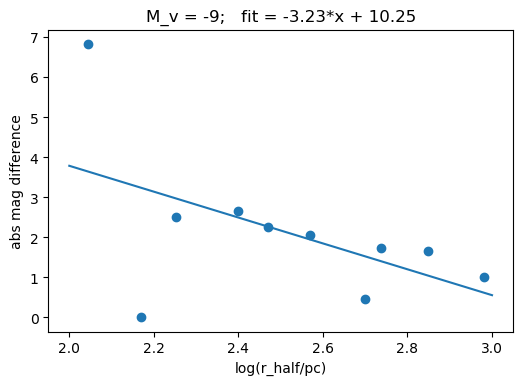

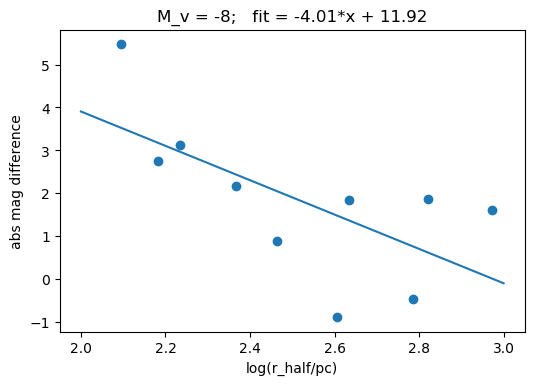

In [13]:
#r_half dependence, binned by m_v

for mv in [-12, -11, -10, -9, -8]:
    cut = abs(results['m_v'] - mv) < 0.3
    plt.figure()
    plt.scatter(results[cut]['logrhalf_pc'], delta[cut])
    plt.xlabel('log(r_half/pc)')
    plt.ylabel('abs mag difference')
    plt.title('M_v = {}'.format(mv))
    
    fit = np.polyfit(results[cut]['logrhalf_pc'], delta[cut], 1)
    m,b = fit
    fit_func = np.poly1d(fit)
    xx = np.arange(2.0, 3.1, 0.2)
    plt.plot(xx, fit_func(xx))
    plt.title("M_v = {};   ".format(mv) + "fit = {:.2f}*x + {:.2f}".format(m,b))
    
# This is basically just recapitulating the stellar density dependence; 
# with m_v fixed, varying r_half is the same as varying stellar density

## Old stuff below here

In [1]:
import numpy as np
import yaml
import load_data
import simSatellite
import ugali.utils.projector

In [2]:
with open('../local_v2.yaml') as ymlfile:
    cfg = yaml.load(ymlfile)
inputs = load_data.Inputs(cfg)

/Users/mcnanna/anaconda2/envs/ugali-env/lib/python2.7/site-packages/ipykernel_launcher.py:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  


NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 4096
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


In [3]:
log_r_physical_pcs = np.arange(1.4, 3.8, 0.2)
r_physicals = 10**log_r_physical_pcs
abs_mags = np.arange(-2.5, -14.5, -0.5)

ra, dec = 2.87, -38.44
distance = 2000 #kpc

In [12]:
tucB = simSatellite.SimSatellite(inputs, ra, dec, 1400, -6.9, 80, use_completeness=False, use_efficiency=False)
stars = tucB.stars
cut = stars['PSF_MAG_R_CORRECTED'] < 27.0
stars = stars[cut]
angseps = ugali.utils.projector.angsep(ra, dec, stars['RA'], stars['DEC'])

radius = 0.5 * tucB.a_h
area = np.pi*(radius*3600)**2
n = np.count_nonzero(angseps < radius)
density = n/area
print(round(area,1), n, round(density,3))

(109.1, 181, 1.659)


In [4]:
# Quick and dirty version. Uses r_mag = 27.0 as cutoff for inclusion of stars. 
# Looks at 0.5*r_h density to determine if we can skip this magnitude for being too dim
# Looks at 1*r_h to determine if we can safely say its blended at all brighter mags

n_trials = 3

n_r = len(r_physicals)
n_m = len(abs_mags)

radii_factors = 1/2., 1., 2.

densities = np.zeros((n_r, n_m, len(radii_factors)))

for i in range(n_r):
    blended_flag = False # Reset flag
    for j in range(n_m):
        if blended_flag: 
            # If it was blended at dimmer mags, assume blended when brighter
            densities[i,j] = [99.9, 99.9, 99.9]
            continue
        if i > 0 and densities[i-1, j, 0] < 1.0: ##### Choosing only 0.5*r_h density here #####
            # If it wasn't blended at this mag at a smaller radius, it won't be here either
            densities[i, j] = [0., 0., 0.]
            continue
            
        r, m = r_physicals[i], abs_mags[j]
        if m < -12.6:
            continue # It takes too much memory to simulate brighter galaxies
        for _ in range(n_trials):
            sim = simSatellite.SimSatellite(inputs, ra, dec, distance, m, r, use_completeness=False, use_efficiency=False)
            stars = sim.stars
            cut = stars['PSF_MAG_R_CORRECTED'] < 27.0
            stars = stars[cut]
            
            angseps = ugali.utils.projector.angsep(ra, dec, stars['RA'], stars['DEC'])
            for k, factor in enumerate(radii_factors):
                radius = factor*sim.a_h # degrees
                n = np.count_nonzero(angseps < radius)
                area = np.pi * (radius*3600.)**2 # Assuming simple area calculation A = pi*r^2
                density = n/area
                #densities[i, j, k] += density
                densities[i, j, k] = max(densities[i, j, k], density)
        #densities[i, j] /= n_trials
            
        if densities[i,j][1] > 1.0: ##### Choosing only 1*r_h density here #####
            blended_flag = True
            
        print("({}, {}): {}, {}, {}".format(r, m, *densities[i,j]))

(25.1188643151, -2.5): 0.379445877907, 0.237153673692, 0.0711461021076
(25.1188643151, -3.0): 0.379445877907, 0.237153673692, 0.0711461021076
(25.1188643151, -3.5): 0.379445877907, 0.28458440843, 0.142292204215
(25.1188643151, -4.0): 1.32806057268, 0.616599551599, 0.260869041061
(25.1188643151, -4.5): 2.27667526744, 1.18576836846, 0.450591980015
(39.8107170553, -4.0): 0.528710436869, 0.321002765242, 0.136898238118
(39.8107170553, -4.5): 0.830830686509, 0.37765031205, 0.141618867019
(39.8107170553, -5.0): 1.05742087374, 0.604240499279, 0.278517105137
(39.8107170553, -5.5): 1.43507118579, 0.944125780124, 0.415415343255
(39.8107170553, -6.0): 1.96378162266, 1.43507118579, 0.585357983677
(63.095734448, -5.0): 0.390897772613, 0.233035210596, 0.0958451269387
(63.095734448, -5.5): 0.631450248066, 0.39841503747, 0.140948716086
(63.095734448, -6.0): 1.02234802068, 0.661519307498, 0.276259483529
(63.095734448, -6.5): 1.38317673386, 1.01483075582, 0.411570250972
(100.0, -6.0): 0.43094549396, 0.24

In [36]:
# Full calculation (abs_mag > -13.0)

n_trials = 3

n_r = len(r_physicals)
n_m = len(abs_mags)

radii_factors = 1/2., 1., 2.

densities = np.zeros((n_r, n_m, len(radii_factors)))

for i in range(n_r):
    for j in range(n_m):
        r, m = r_physicals[i], abs_mags[j]
        if m < -13.1:
            continue # It takes too much memory to simulate brighter galaxies
        for _ in range(n_trials):
            sim = simSatellite.SimSatellite(inputs, ra, dec, distance, m, r, use_completeness=False, use_efficiency=True)
            stars = sim.stars
            angseps = ugali.utils.projector.angsep(ra, dec, stars['RA'], stars['DEC'])
        
            for k, factor in enumerate(radii_factors):
                radius = factor*sim.a_h # degrees
                n = np.count_nonzero(angseps < radius)
                area = np.pi * (radius*3600.)**2 # Assuming simple area calculation A = pi*r^2
                density = n/area
                densities[i, j, k] += density
        densities[i, j] /= n_trials
            
        print("({}, {}): {}, {}, {}".format(r, m, *densities[i,j]))

(25.1188643151, -2.5): 0.0, 0.0158102449128, 0.0079051224564
(25.1188643151, -3.0): 0.0, 0.0316204898256, 0.0118576836846
(25.1188643151, -3.5): 0.0, 0.0632409796512, 0.0237153673692
(25.1188643151, -4.0): 0.126481959302, 0.142292204215, 0.0474307347384
(25.1188643151, -4.5): 0.50592783721, 0.205533183866, 0.0711461021076
(25.1188643151, -5.0): 0.632409796512, 0.379445877907, 0.134387081759
(25.1188643151, -5.5): 0.758891755814, 0.39525612282, 0.158102449128
(25.1188643151, -6.0): 1.32806057268, 0.711461021076, 0.233201112464
(25.1188643151, -6.5): 1.58102449128, 0.837942980378, 0.363635632994
(25.1188643151, -7.0): 1.96047036919, 1.32806057268, 0.608694429143
(39.8107170553, -2.5): 0.0, 0.012588343735, 0.00472062890062
(39.8107170553, -3.0): 0.0, 0.012588343735, 0.00472062890062
(39.8107170553, -3.5): 0.0503533749399, 0.02517668747, 0.00786771483437
(39.8107170553, -4.0): 0.0503533749399, 0.02517668747, 0.0220296015362
(39.8107170553, -4.5): 0.22659018723, 0.0881184061449, 0.028323773

(630.95734448, -5.0): 0.000701611363697, 0.000350805681848, 0.000150345292221
(630.95734448, -5.5): 0.000601381168883, 0.000425978327959, 0.000187931615276
(630.95734448, -6.0): 0.00100230194814, 0.000927129302028, 0.000344541294673
(630.95734448, -6.5): 0.00310713603923, 0.00157862556832, 0.000682818202169
(630.95734448, -7.0): 0.00370851720811, 0.00235540957813, 0.000952186850731
(630.95734448, -7.5): 0.00591358149402, 0.0036082870133, 0.00153477485809
(630.95734448, -8.0): 0.00972232889694, 0.00616415698105, 0.00253707680623
(630.95734448, -8.5): 0.0154354500013, 0.0101733647736, 0.00402173656691
(630.95734448, -9.0): 0.0248570883138, 0.0153853349039, 0.00613283504517
(630.95734448, -9.5): 0.0355817191589, 0.0237044410735, 0.00959704115342
(630.95734448, -10.0): 0.0610401886416, 0.0376113806039, 0.0155795309064
(630.95734448, -10.5): 0.0947175340991, 0.0592611026837, 0.0246190416011
(630.95734448, -11.0): 0.153352198065, 0.0959704115342, 0.0390333964928
(630.95734448, -11.5): 0.2295

KeyboardInterrupt: 

In [28]:
np.save('densities_cutoff.npy', densities)

In [21]:
blended = densities > 1
for i in range(n_r):
    for j in range(n_m):
        if blended[i,j,0]:
            print(round(np.log10(r_physicals[i]), 1), abs_mags[j], np.count_nonzero(blended[i,j]))

(1.4, -4.0, 1)
(1.4, -4.5, 2)
(1.4, -5.0, 3)
(1.4, -5.5, 3)
(1.4, -6.0, 3)
(1.4, -6.5, 3)
(1.4, -7.0, 3)
(1.4, -7.5, 3)
(1.4, -8.0, 3)
(1.4, -8.5, 3)
(1.4, -9.0, 3)
(1.4, -9.5, 3)
(1.4, -10.0, 3)
(1.4, -10.5, 3)
(1.4, -11.0, 3)
(1.4, -11.5, 3)
(1.4, -12.0, 3)
(1.4, -12.5, 3)
(1.4, -13.0, 3)
(1.4, -13.5, 3)
(1.4, -14.0, 3)
(1.6, -5.0, 1)
(1.6, -5.5, 1)
(1.6, -6.0, 2)
(1.6, -6.5, 3)
(1.6, -7.0, 3)
(1.6, -7.5, 3)
(1.6, -8.0, 3)
(1.6, -8.5, 3)
(1.6, -9.0, 3)
(1.6, -9.5, 3)
(1.6, -10.0, 3)
(1.6, -10.5, 3)
(1.6, -11.0, 3)
(1.6, -11.5, 3)
(1.6, -12.0, 3)
(1.6, -12.5, 3)
(1.6, -13.0, 3)
(1.6, -13.5, 3)
(1.6, -14.0, 3)
(1.8, -6.0, 1)
(1.8, -6.5, 2)
(1.8, -7.0, 3)
(1.8, -7.5, 3)
(1.8, -8.0, 3)
(1.8, -8.5, 3)
(1.8, -9.0, 3)
(1.8, -9.5, 3)
(1.8, -10.0, 3)
(1.8, -10.5, 3)
(1.8, -11.0, 3)
(1.8, -11.5, 3)
(1.8, -12.0, 3)
(1.8, -12.5, 3)
(1.8, -13.0, 3)
(1.8, -13.5, 3)
(1.8, -14.0, 3)
(2.0, -7.0, 1)
(2.0, -7.5, 1)
(2.0, -8.0, 2)
(2.0, -8.5, 3)
(2.0, -9.0, 3)
(2.0, -9.5, 3)
(2.0, -10.0, 3)
(2.0, -10.5,

In [25]:
log_r_physical_pcs[9]
abs_mags[-2]

-13.5

In [27]:
densities[9][-1] = 99.9, 99.9, 99.9